# AlphAlens Reloaded로 팩터 리스크 및 성과 평가하기

팩터 투자(Factor Investing)는 높은 수익과 연관된 속성 또는 **팩터(Factors)** 를 기반으로 자산을 선택하는 전략적 접근 방식입니다. 이 방법은 주식, 채권, 섹터와 같은 자산군을 중심으로 하는 전통적인 투자 전략과 다릅니다. 팩터 투자는 증권의 리스크와 수익의 근본적인 동인을 강조합니다. 팩터 투자 전략의 핵심은 이러한 팩터와 기타 요인들을 체계적으로 식별하고 활용하는 것입니다. 리스크와 수익의 원천을 이해함으로써 우리는 전통적인 벤치마크를 초과하는 수익을 목표로 할 수 있습니다. 하지만 팩터 투자가 포트폴리오 다각화 및 잠재적 수익을 향상시킬 수 있는 반면, 리스크를 완전히 제거하지는 않습니다. 시장 상황, 경제 변화 및 기타 외부 요인들은 특정 시점에서 팩터 기반 전략의 효과성에 영향을 미칠 수 있습니다.

**[Chapter 5, Build Alpha Factors for Stock Portfolios](챕터 5, 주식 포트폴리오를 위한 알파 팩터 구축)** 에서는 알파 팩터를 구성하는 방법에 대한 예제를 제공합니다. 이 챕터에서는 AlphAlens Reloaded를 활용하여 이러한 알파 팩터의 리스크 및 성과를 분석하는 방법을 살펴봅니다.  
AlphAlens Reloaded는 성과 분석을 위해 특별히 설계된 라이브러리입니다. 다양한 팩터에서 생성된 신호의 품질을 평가하는 데 유용하며, 이러한 신호가 미래 수익을 얼마나 잘 예측하는지 평가할 수 있습니다. AlphAlens Reloaded는 Zipline Reloaded와 통합되어 백테스트 결과를 분석 및 시각화하는 도구로 변환합니다. 이 라이브러리는 누적 수익률, 회전율 분석, 정보 계수 등 다양한 성과 지표를 포함하는 보고서를 제공합니다.

이 챕터에서는 다음과 같은 내용을 다룹니다.

- 백테스트 결과 준비하기
- 정보 계수 평가하기
- 팩터 수익률 분석하기
- 팩터 회전율 평가하기

---

## **백테스트 결과 준비하기**

Zipline Reloaded는 거래 전략의 성과를 평가하는 도구가 통합된 강력한 백테스팅 라이브러리입니다. 이 챕터의 핵심은 Zipline Reloaded와 통합된 AlphAlens Reloaded를 활용하는 것입니다.

우리는 **챕터 7, Zipline Reloaded를 활용한 이벤트 기반 팩터 포트폴리오 백테스팅** 에서 Zipline 백테스트의 출력 DataFrame이 특정 기간 동안의 거래 전략 성과를 자세히 분석한다는 점을 배웠습니다. 이 출력에는 누적 수익률, 알파, 베타, 샤프 비율(Sharpe Ratio), 최대 손실(Maximum Drawdown) 등의 지표가 포함됩니다.  
AlphAlens Reloaded를 사용하기 위해서는 이러한 백테스트 결과를 변형하여 적절한 형태로 변환해야 합니다. 이 섹션에서는 해당 데이터를 추출하는 과정을 설명합니다.

---

### 준비하기

AlphAlens Reloaded를 가상 환경에 설치하려면, 다음 명령어를 실행하세요.

In [2]:
# !pip install alphalens-reloaded


우리는 `mean_reversion.pickle` 파일이 코드와 동일한 디렉토리에 존재한다고 가정합니다. 이 파일은 **[Chapter 5, Build Alpha Factors for Stock Portfolios](챕터 5, 주식 포트폴리오를 위한 알파 팩터 구축)** 에서 실행한 Zipline 백테스트의 캐시된 출력 파일입니다.

---

### 실행 방법

이 섹션에서는 pandas를 사용하여 Zipline 백테스트의 출력을 조작하는 방법을 설명합니다.  
AlphAlens Reloaded에서 분석을 수행하기 위해 DataFrame을 생성하는 한 가지 방법을 소개합니다.


In [28]:
import warnings

1. 분석에 필요한 라이브러리 가져오기

In [29]:
import pandas as pd
from alphalens.utils import get_clean_factor_and_forward_returns
from IPython.display import Markdown, display

In [30]:
warnings.filterwarnings("ignore")

2. 백테스트 출력을 DataFrame으로 불러오기

평균 회귀 데이터 불러오기

In [31]:
mean_reversion = pd.read_pickle("mean_reversion.pickle")

3. 심볼(Symbols)을 열(Column)로, 날짜(Dates)를 행(Row)로 하는 DataFrame 생성하기

가격 데이터에 대해 심볼을 열로, 날짜를 행으로 하는 DataFrame 구성하기

In [32]:
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

>**중요 (IMPORTANT)**  
>
>Python의 리스트 컴프리헨션(List Comprehension)은 리스트를 생성하는 간결한 방법으로, 반복 가능한(iterable) 객체를 순회하면서 각 요소에 표현식을 적용하는 방식입니다.  
이는 루프와 리스트 추가 연산을 하나의 코드 줄로 압축하여 보다 가독성이 높고 우아한 코드 작성을 가능하게 합니다.  
문법은 대괄호(`[]`) 안에 표현식과 `for` 절을 포함하는 형태로 구성되며, 이는 위의 **3단계(Step 3)** 에서 확인할 수 있습니다.

4. 열(Column) 이름을 문자열(String)로 변환하기

열(Column) 이름을 문자열(String)로 변환하기

In [33]:
prices.columns = [col.symbol for col in prices.columns]

5. 타임스탬프를 자정(00:00)으로 정규화(Normalize)하여 시간대 정보 유지하기

시간대 정보를 유지하면서 타임스탬프를 자정(00:00)으로 정규화

**결과:**  이제 생성된 DataFrame은 각 날짜별로 백테스트에 포함된 각 자산(asset)의 가격 데이터를 포함합니다.

In [34]:
prices.index = prices.index.normalize()

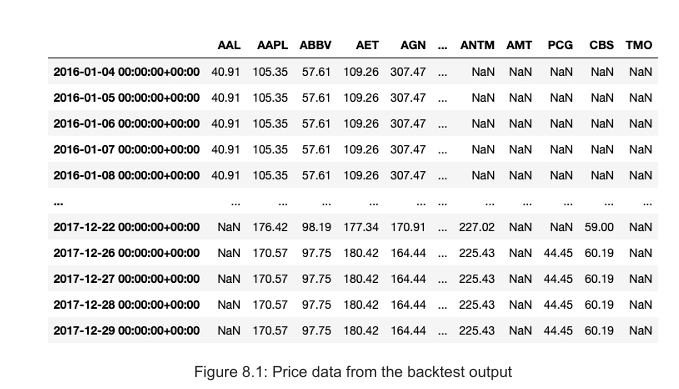

6. 팩터 데이터(Factor Data)에 대해 유사한 프로세스를 반복합니다.  


열(Column)에 심볼(Symbol)을, 행(Row)에 팩터 랭크(Factor Rank)를 포함하는 DataFrame 생성하기

In [35]:
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

In [36]:
factor_data

,Equity(0 [A]),Equity(2 [AAL]),Equity(7 [AAP]),Equity(8 [AAPL]),Equity(12 [ABBV]),Equity(13 [ABC]),Equity(20 [ABT]),Equity(27 [ACE]),Equity(37 [ACN]),Equity(45 [ADBE]),...,Equity(1748 [MAC]),Equity(2134 [OSTK]),Equity(2633 [SPLK]),Equity(448 [BWLD]),Equity(548 [CGNX]),Equity(2097 [OLED]),Equity(2400 [RGC]),Equity(361 [BHGE]),Equity(1124 [FOX]),Equity(1994 [NKTR])
2016-01-04 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,NaN,588.0,206.0,1826.0,1592.0,93.0,2130.0,NaN,862.0,2323.0,...,1174.0,613.0,186.0,511.0,2460.0,2257.0,9.0,980.0,49.0,NaN
2017-12-26 21:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0
2017-12-27 21:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0
2017-12-28 21:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0


7. 열(Column) 이름을 문자열(String)로 변환하기

열(Column) 이름을 문자열(String)로 변환하기

In [37]:
factor_data.columns = [col.symbol for col in factor_data.columns]

In [38]:
factor_data

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACE,ACN,ADBE,...,MAC,OSTK,SPLK,BWLD,CGNX,OLED,RGC,BHGE,FOX,NKTR
2016-01-04 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,NaN,588.0,206.0,1826.0,1592.0,93.0,2130.0,NaN,862.0,2323.0,...,1174.0,613.0,186.0,511.0,2460.0,2257.0,9.0,980.0,49.0,NaN
2017-12-26 21:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0
2017-12-27 21:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0
2017-12-28 21:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0


8. 타임스탬프를 자정(00:00)으로 정규화(Normalize)하여 시간대 정보 유지하기

시간대 정보를 유지하면서 타임스탬프를 자정(00:00)으로 정규화

In [39]:
factor_data.index = factor_data.index.normalize()

In [41]:
factor_data

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACE,ACN,ADBE,...,MAC,OSTK,SPLK,BWLD,CGNX,OLED,RGC,BHGE,FOX,NKTR
2016-01-04 00:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06 00:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07 00:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08 00:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 00:00:00+00:00,NaN,588.0,206.0,1826.0,1592.0,93.0,2130.0,NaN,862.0,2323.0,...,1174.0,613.0,186.0,511.0,2460.0,2257.0,9.0,980.0,49.0,NaN
2017-12-26 00:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0
2017-12-27 00:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0
2017-12-28 00:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0


9. `date`를 레벨 0으로, `symbol`을 레벨 1로 갖는 **MultiIndex** 생성하기

레벨 0에는 날짜(date)를, 레벨 1에는 심볼(symbol)을 갖는 멀티인덱스 생성하기

In [42]:
factor_data = factor_data.stack()

In [43]:
factor_data 

2016-01-04 00:00:00+00:00  A        321.0
                           AAL     1156.0
                           AAP     1556.0
                           AAPL    2547.0
                           ABBV     438.0
                                    ...  
2017-12-29 00:00:00+00:00  OLED    2201.0
                           RGC       67.0
                           BHGE     510.0
                           FOX      120.0
                           NKTR    1389.0
Length: 150777, dtype: float64

10. MultiIndex 이름 변경하기

멀티인덱스 이름 변경하기

In [44]:
factor_data.index.names = ["date", "asset"]

팩터 데이터 출력하기

**결과:**  생성된 MultiIndex Series는 **데이터와 자산(asset)이 인덱스(Index)에 있고, 팩터 랭크(Factor Ranking)가 열(Column)에 포함된 형태**입니다.

In [45]:
display(factor_data)

date                       asset
2016-01-04 00:00:00+00:00  A         321.0
                           AAL      1156.0
                           AAP      1556.0
                           AAPL     2547.0
                           ABBV      438.0
                                     ...  
2017-12-29 00:00:00+00:00  OLED     2201.0
                           RGC        67.0
                           BHGE      510.0
                           FOX       120.0
                           NKTR     1389.0
Length: 150777, dtype: float64

11. 마지막 단계는 **MultiIndex DataFrame**을 생성하여 미래 수익률(Forward Returns), 팩터 값(Factor Values), 그리고 팩터 분위수(Factor Quantiles)를 포함하는 것입니다.

Alphalens를 사용하여 미래 수익률, 팩터 순위, 팩터 분위수를 컴파일하기

In [46]:
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63), quantiles=5
)

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


Alphalens 데이터 출력하기

**결과:** 생성된 **MultiIndex DataFrame**은 **Alphalens Reloaded를 사용하여 모든 팩터 분석을 실행하는 데 필요한 데이터**를 포함하고 있습니다.

In [47]:
display(alphalens_data)

5D       10D       21D       63D  \
date                      asset                                           
2016-01-04 00:00:00+00:00 A      0.000000  0.000000  0.000000  0.000000   
                          AAL    0.004155 -0.050110 -0.037399 -0.037644   
                          AAP   -0.034091 -0.050053  0.017407 -0.028705   
                          AAPL  -0.064737 -0.082487 -0.084670  0.054770   
                          ABBV  -0.064746 -0.045478 -0.055893  0.027773   
...                                   ...       ...       ...       ...   
2017-09-29 00:00:00+00:00 NTAP   0.000000  0.000000  0.000000  0.308197   
                          CPN    0.007488  0.012253  0.012253  0.012253   
                          EFX    0.025883  0.068132  0.037301  0.051480   
                          ANDV  -0.014533  0.013108 -0.013868  0.085676   
                          ALNY   0.045027  0.038021  0.050581  0.065277   

                                 factor  factor_quantile  
date                      asset                           
2016-01-04 00:00:00+00:00 A       321.0                1  
                          AAL    1156.0                3  
                          AAP    1556.0                4  
                          AAPL   2547.0                5  
                          ABBV    438.0                1  
...                                 ...              ...  
2017-09-29 00:00:00+00:00 NTAP    456.0                1  
                          CPN    1907.0                4  
                          EFX    2501.0                5  
                          ANDV   1194.0                3  
                          ALNY    320.0                1  

[131916 rows x 6 columns]

---

### **작동 방식**  

라이브러리를 임포트한 후, 우리는 백테스트 출력을 조작해야 합니다. 

1) 먼저, `prices`라는 DataFrame을 생성하는데, 여기서 각 열(Column)은 특정 종목(Symbol)을, 각 행(Row)은 특정 날짜(Date)를 나타냅니다.  
이를 위해 `prices`의 각 행을 순회하며(`items` 메서드 사용), 각 키(Key)는 날짜이고 각 값(Value)은 해당 날짜의 가격 데이터를 나타내는 DataFrame이 됩니다.  
각 DataFrame을 `to_frame()` 메서드를 사용하여 열(Column)로 변환한 후, `concat()` 함수를 활용해 `axis=1`을 기준으로 가로로 결합합니다.  

2) 다음으로, `prices` DataFrame의 기존 열(Column) 이름이 `Equity` 객체로 설정되어 있으므로, 이를 **심볼(Symbol) 문자열**로 변경합니다.  
또한, 날짜 인덱스를 **자정(00:00)으로 정규화(Normalize)** 하여 시간대 정보를 유지합니다.  

3) 팩터 데이터를 백테스트 출력에서 추출하는 과정도 유사합니다.  
먼저, `factor_data` 열을 순회하면서 **모든 null 값을 제거(dropna)** 한 후, 데이터를 변환하여 각 날짜(Date)가 고유한 열(Column)에 대응하도록 합니다.  
그 후, 열 이름을 문자열(String)로 변환하고 날짜 인덱스를 조정합니다.  
마지막으로, **stack() 메서드를 활용해** 2차원 테이블을 **1차원 Series로 변환**하면서 **계층적 인덱스(Hierarchical Index)** 를 부여합니다.  
결과적으로, 생성된 MultiIndex Series에서 **첫 번째 레벨(Level 0) 인덱스는 날짜(Date), 두 번째 레벨(Level 1) 인덱스는 자산(Symbol)** 이 됩니다.  

4) 이제 DataFrame이 준비되었으므로, **Alphalens Reloaded의 `get_clean_factor_and_forward_returns()` 함수를 호출할 수 있습니다.**  
이 함수는 **팩터 값(Factor Value)을 미래 수익률(Forward Returns)과 연결하는 역할**을 합니다.  
출력 결과(`alphalens_data` 변수)는 **팩터 데이터(Factor Data)와 미래 수익률(Future Returns)** 을 결합한 DataFrame이 됩니다.  

이제 생성된 구조를 활용해 특정 팩터 값(Factor Value)이 미래 자산 수익률에 어떻게 영향을 미쳤는지 분석할 수 있습니다.  
**결과 DataFrame**은 **날짜(Date)와 심볼(Symbol)로 구성된 MultiIndex** 를 포함하며,  
각 열(Column)에는 **미래 수익률(5일, 10일, 21일, 63일), 팩터 값(Factor Value), 그리고 팩터 분위수(Quantile Ranking)** 가 저장됩니다.  

팩터 분위수는 특정 자산의 팩터 값이 해당 날짜(Date)에서 **어떤 분위(Bucket)에 속하는지** 를 나타냅니다.  
예를 들어, 값이 `"3"` 또는 `"5"`와 같은 형태로 표시됩니다.  

이 DataFrame은 이후 모든 분석에 사용됩니다.  

---

### **추가 정보**  

**Alphalens Reloaded의 `get_clean_factor_and_forward_returns` 함수** 는 **팩터 데이터를 후속 분석을 위해 정리(Align)하는 기능**을 합니다.  
팩터 값(Factor Value)과 미래 수익률(Forward Returns)을 정렬하여, 팩터와 미래 성과 간의 비교가 정확히 이루어지도록 합니다.  

이 함수는 데이터 정리 과정에서 **누락된 값(Missing Values) 처리 기능** 도 포함하고 있습니다.  
결과적으로, **팩터 분석에 최적화된 DataFrame을 반환합니다.**  

또한, `get_clean_factor_and_forward_returns()` 함수는 팩터 데이터와 수익률 데이터를 정렬하는 방식에서 유연성을 제공하며,  
다음과 같은 **추가 인자(Arguments)** 를 활용해 정렬 방식을 조정할 수 있습니다.

- **`groupby`**: 선택적(Optional) 인자로, **산업(Industry) 또는 섹터(Sector)와 같은 특정 특성을 기준으로 그룹(Grouping)화** 합니다.  
  이를 활용하면 **섹터 중립(Sector-Neutral) 분석** 이 가능합니다.

- **`by_group`**: `True`로 설정하면 **각 그룹별(Group-by)로 계산(예: 분위수 분석)** 을 수행할지 여부를 결정합니다.  
  기본값은 데이터 전체를 기준으로 분석합니다.

- **`bins`**: 분위수(Quantile) 대신 **수동으로 지정된 구간(Bin)을 기준으로 데이터 분할** 이 가능합니다.  

- **`quantiles`**: 팩터 데이터를 **몇 개의 분위(Quantile)로 나눌지** 를 지정합니다.  
  예를 들어, `quantiles=5` 로 설정하면 **5개 분위(Quintile) 기준으로 데이터를 분류** 합니다.  

- **`periods`**: **미래 수익률(Forward Returns)을 계산할 기간** 을 리스트(List) 형태로 지정할 수 있습니다.  
  예: `[1, 5, 10]` → **1일, 5일, 10일 후의 수익률 계산**  

- **`filter_zscore`**: **Z-스코어(Z-score) 기반 이상치(Outliers) 제거** 기능을 제공합니다.  
  이를 통해, 극단적인 팩터 값이 분석을 왜곡하는 것을 방지할 수 있습니다.  

- **`groupby_labels`**: `groupby`를 사용할 때, 각 그룹(Group)에 **의미 있는 이름(Label)을 부여** 할 수 있도록 합니다.  

- **`max_loss`**: **누락된 데이터 허용 비율** 을 백분율(%)로 지정합니다.  
  **허용 가능한 데이터 손실(Maximum Missing Data Loss) 비율을 결정** 합니다.  

- **`zero_aware`**: `True`로 설정하면, **팩터 값이 0인 경우에도 독립적인 분위수 그룹으로 인식** 합니다.  
  특정 컨텍스트(예: 일부 팩터에서 0이 의미 있는 값일 때)에 유용합니다.  

---

### **참고 자료**  

팩터 투자는 광범위한 주제입니다. Richard C. Grinold 및 Ronald N. Khan의 **"Active Portfolio Management: A Quantitative Approach for Producing Superior Returns and Controlling Risk"** 책은 **퀀트 금융(Quantitative Finance) 및 포트폴리오 관리(Portfolio Management)** 분야에서 필독서로 꼽힙니다. 이 책에서는 **팩터 기반 투자(Factor-Based Investing)** 와 관련된 **수학적 모델, 전략, 백테스팅 기법** 을 깊이 다룹니다. 특히, **미래 수익률(Forward Returns)이 팩터 성과 평가에 미치는 영향** 에 대해 강조하고 있습니다.  

📖 Amazon에서 해당 도서를 구매할 수 있습니다: 🔗 **[https://amzn.to/3RstovG](https://amzn.to/3RstovG)**  

마지막으로, **Alphalens Reloaded 공식 문서(Documentation)** 에서는 보다 상세한 코드 사용 방법을 제공합니다. 

📄 공식 문서 링크: 🔗 **[https://alphalens.ml4trading.io](https://alphalens.ml4trading.io)**  

---

## 정보 계수 평가



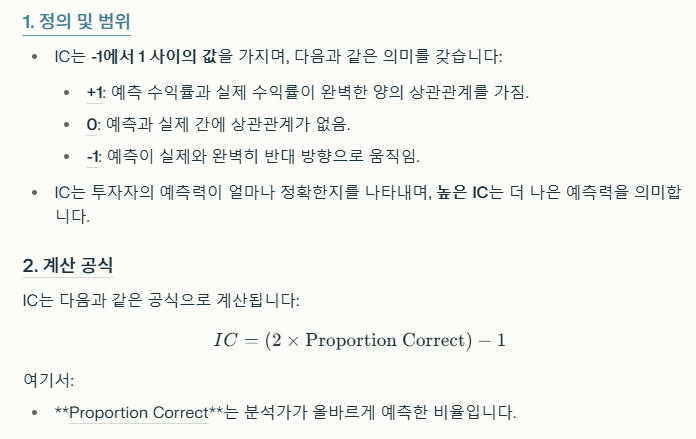


**정보 계수(IC)**는 양적 포트폴리오 구성에서 기본적인 지표입니다. 이는 예측이 미래 수익률과 얼마나 연관성이 있는지를 평가하는 지표입니다. IC는 기본적으로 **스피어만 순위 상관관계(Spearman rank correlation)** 를 사용하며, 이는 두 변수 간 관계의 강도를 비모수적 방식으로 측정하는 방법입니다. IC 값은 -1에서 1 사이이며, **양의 IC 값**은 예측이 실제 수익률을 잘 반영함을 의미하고, **0에 가까운 값**은 예측력이 없음을 나타내며, **음의 값**은 예측과 실제 수익률이 반대 방향으로 움직임을 뜻합니다.

IC의 개념은 1960~1970년대로 거슬러 올라갑니다. 이 지표의 초기 개념은 1960년대 초반 **잭 L. 트레이너(Jack L. Treynor)** 에 의해 성과 측정과 투자 결정의 상관관계를 연구하는 과정에서 등장했습니다. 이후 1970년대 중반에는 **피셔 블랙(Fischer Black)** 이 이 개념을 더욱 발전시켰으며, 그는 블랙-숄즈(Black-Scholes) 옵션 가격 결정 모델로도 잘 알려져 있습니다. 이후 학계에서도 이 개념을 지속적으로 연구하면서, 오늘날 IC는 알파 팩터(alpha factors)의 예측력을 평가하는 핵심 지표로 자리 잡았습니다.

**Alphalens Reloaded**는 방대한 양의 양적 연구를 하나의 도구로 통합하여 팩터 평가를 쉽게 수행할 수 있도록 합니다. 복잡한 방법론을 단순화하여, 팩터의 예측력을 분석하는 직관적인 접근 방식을 제공합니다.

이 레시피에서는 그 방법을 살펴보겠습니다.

---

### 준비 과정...

이 레시피와 이후의 과정에서는 **이전 레시피에서 사용된 라이브러리가 이미 임포트되었으며**, `alphalens_data`가 정의되어 있다고 가정합니다.

---

### 실행 방법...

Alphalens Reloaded는 분석 결과를 한눈에 볼 수 있도록 요약된 보고서(tear sheets)를 제공합니다. 이 레시피에서는 각각의 분석 요소를 개별적으로 살펴보며 개념을 심화해 보겠습니다.

In [48]:
import warnings

1. **IC를 평가하기 위해 Alphalens Reloaded의 추가 라이브러리를 임포트합니다.**

In [49]:
import alphalens
import pandas as pd
from alphalens.performance import (
    factor_information_coefficient,
    mean_information_coefficient,
)
from alphalens.plotting import plot_ic_ts, plot_information_table
from alphalens.utils import get_clean_factor_and_forward_returns
from IPython.display import Markdown, display

In [50]:
warnings.filterwarnings("ignore")

평균 회귀 데이터 불러오기

In [51]:
mean_reversion = pd.read_pickle("mean_reversion.pickle")

종목 심볼을 열로, 날짜를 행으로 하는 가격 데이터프레임 구성

In [52]:
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

열 이름을 문자열로 변환

In [53]:
prices.columns = [col.symbol for col in prices.columns]

시간대 정보를 유지하면서 타임스탬프를 자정으로 정규화

In [55]:
prices.index = prices.index.normalize()

In [56]:
prices

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACE,ACN,ADBE,...,MAC,OSTK,SPLK,BWLD,CGNX,OLED,RGC,BHGE,FOX,NKTR
2016-01-04 00:00:00+00:00,40.69,40.91,152.24,105.35,57.61,101.87,42.93,113.73,101.83,91.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,40.69,40.91,152.24,105.35,57.61,101.87,42.93,113.73,101.83,91.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06 00:00:00+00:00,40.69,40.91,152.24,105.35,57.61,101.87,42.93,113.73,101.83,91.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07 00:00:00+00:00,40.69,40.91,152.24,105.35,57.61,101.87,42.93,113.73,101.83,91.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08 00:00:00+00:00,40.69,40.91,152.24,105.35,57.61,101.87,42.93,113.73,101.83,91.97,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 00:00:00+00:00,NaN,51.49,102.71,176.42,98.19,92.40,56.40,NaN,151.72,176.75,...,65.68,75.8,83.54,156.45,61.74,178.35,22.83,31.03,34.50,NaN
2017-12-26 00:00:00+00:00,NaN,52.85,101.96,170.57,97.75,93.25,57.00,NaN,152.99,174.44,...,NaN,69.2,82.27,156.30,61.08,170.60,22.95,32.06,34.17,60.0
2017-12-27 00:00:00+00:00,NaN,52.85,101.96,170.57,97.75,93.25,57.00,NaN,152.99,174.44,...,NaN,69.2,82.27,156.30,61.08,170.60,22.95,32.06,34.17,60.0
2017-12-28 00:00:00+00:00,NaN,52.85,101.96,170.57,97.75,93.25,57.00,NaN,152.99,174.44,...,NaN,69.2,82.27,156.30,61.08,170.60,22.95,32.06,34.17,60.0


열에는 종목 심볼이, 행에는 팩터 순위가 있는 데이터프레임 구성

In [58]:
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

In [59]:
factor_data

,Equity(0 [A]),Equity(2 [AAL]),Equity(7 [AAP]),Equity(8 [AAPL]),Equity(12 [ABBV]),Equity(13 [ABC]),Equity(20 [ABT]),Equity(27 [ACE]),Equity(37 [ACN]),Equity(45 [ADBE]),...,Equity(1748 [MAC]),Equity(2134 [OSTK]),Equity(2633 [SPLK]),Equity(448 [BWLD]),Equity(548 [CGNX]),Equity(2097 [OLED]),Equity(2400 [RGC]),Equity(361 [BHGE]),Equity(1124 [FOX]),Equity(1994 [NKTR])
2016-01-04 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-06 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-07 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-08 21:00:00+00:00,321.0,1156.0,1556.0,2547.0,438.0,273.0,979.0,503.0,2123.0,777.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-22 21:00:00+00:00,NaN,588.0,206.0,1826.0,1592.0,93.0,2130.0,NaN,862.0,2323.0,...,1174.0,613.0,186.0,511.0,2460.0,2257.0,9.0,980.0,49.0,NaN
2017-12-26 21:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0
2017-12-27 21:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0
2017-12-28 21:00:00+00:00,NaN,477.0,183.0,1862.0,1314.0,227.0,1674.0,NaN,691.0,2309.0,...,NaN,1626.0,1745.0,710.0,2453.0,2201.0,67.0,510.0,120.0,1389.0


열 이름을 문자열로 변환

In [60]:
factor_data.columns = [col.symbol for col in factor_data.columns]

시간대 정보를 유지하면서 타임스탬프를 자정으로 정규화

In [61]:
factor_data.index = factor_data.index.normalize()

날짜를 레벨 0, 종목 심볼을 레벨 1로 하는 멀티인덱스 생성

In [62]:
factor_data = factor_data.stack()

멀티인덱스 이름 변경

In [64]:
factor_data.index.names = ["date", "asset"]

In [65]:
factor_data

date                       asset
2016-01-04 00:00:00+00:00  A         321.0
                           AAL      1156.0
                           AAP      1556.0
                           AAPL     2547.0
                           ABBV      438.0
                                     ...  
2017-12-29 00:00:00+00:00  OLED     2201.0
                           RGC        67.0
                           BHGE      510.0
                           FOX       120.0
                           NKTR     1389.0
Length: 150777, dtype: float64

Alphalens를 사용하여 선행 수익률, 팩터 순위 및 팩터 분위수를 컴파일합니다

In [66]:
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


2. **각 보유 종목과 날짜별로 정보 계수를 생성합니다.**

각 보유 기간과 날짜별로 정보계수(IC)를 생성합니다

In [67]:
ic = factor_information_coefficient(alphalens_data)

이 결과로 각 날짜와 향후 수익률에 대한 **정보 계수(IC)가 포함된 데이터프레임**이 생성됩니다.

정보계수(Information Coefficient) 표시

In [68]:
display(ic)

,5D,10D,21D,63D
date,,,,
2016-01-04 00:00:00+00:00,-0.257711,-0.247001,-0.137313,-0.149714
2016-01-05 00:00:00+00:00,-0.257711,-0.247001,-0.137313,-0.149714
2016-01-06 00:00:00+00:00,-0.257711,-0.247001,-0.137313,-0.149714
2016-01-07 00:00:00+00:00,-0.257711,-0.247001,-0.158949,-0.149714
2016-01-08 00:00:00+00:00,-0.257711,-0.237758,-0.158949,-0.123265
...,...,...,...,...
2017-09-25 00:00:00+00:00,0.010020,0.062419,0.053342,-0.051979
2017-09-26 00:00:00+00:00,0.010020,0.062419,0.053342,-0.118785
2017-09-27 00:00:00+00:00,0.010020,0.062419,0.053342,-0.118785


3. 각 미래 수익률에 대한 IC의 통계적 특성을 검사합니다.

정보 테이블 그리기

이 결과로 **IC의 평균(mean), 표준 편차(standard deviation), 기타 통계적 특성이 포함된 표**가 생성됩니다.

In [69]:
plot_information_table(ic)

Information Analysis


,5D,10D,21D,63D
IC Mean,0.016,0.026,0.012,-0.010
IC Std.,0.166,0.154,0.154,0.158
Risk-Adjusted IC,0.099,0.169,0.079,-0.064
t-stat(IC),2.072,3.537,1.666,-1.336
p-value(IC),0.039,0.000,0.096,0.182
IC Skew,0.563,0.269,0.333,0.362
IC Kurtosis,-0.060,-0.590,-0.223,-0.132


4. 알파가 보유 기간이 길어질수록 어떻게 감소하는지 확인하기 위해 다음과 같이 선행 수익률 기간에 대한 IC를 그래프로 표시합니다:

평균 정보계수(IC) 그래프 그리기

<Axes: >

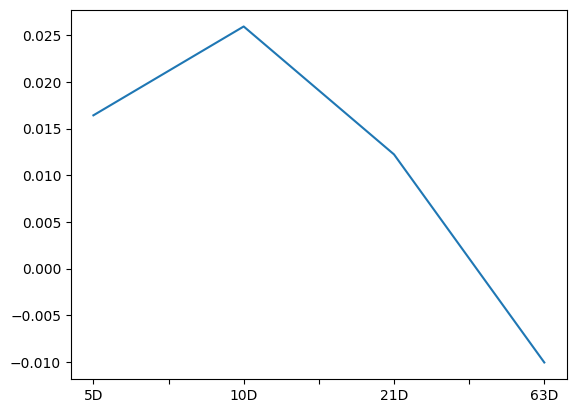

In [70]:
ic_mean = mean_information_coefficient(alphalens_data)
ic_mean.plot()

---

### 작동 방식...

**스피어만 순위 상관관계(Spearman rank correlation)** 는 $\rho$ 또는 **Spearman’s r** 로 표기되며, 두 변수 간 **단조(monotonic) 관계의 강도와 방향을 평가하는 비모수적(non-parametric) 측도**입니다. **피어슨 상관계수(Pearson correlation coefficient)** 와 달리, **스피어만 순위 상관관계는 값의 절대 크기보다는 상대적인 순서(order)에 초점을 맞춥니다**.

**스피어만 순위 상관관계를 계산하는 방법:**

1. 각 변수를 개별적으로 순위(rank)로 변환합니다. 즉, 관측치 $N$개에 대해 **1부터 N까지의 순위를 부여** 합니다. 동일한 값을 가지는 경우 평균 순위를 할당합니다.
2. 각 관측치에 대해 순위 차이를 계산합니다. 이를 **$ d $** 로 표기합니다.
3. 이 차이를 제곱합니다. 즉, **$ d^2 $** 을 계산합니다.
4. 다음 수식을 사용하여 $\rho$를 계산합니다:

   $
   \rho = 1 - \frac{6 \sum d^2}{N (N^2 - 1)}
   $

   **여기서:**
   - **$\rho$** : 스피어만 순위 상관계수
   - **$ d $** : 순위 쌍 간 차이
   - **$ N $** : 관측치의 개수

   $\rho$ 값은 **-1에서 1 사이**의 값을 가집니다.
   - **1에 가까운 값**: 순위 간 **완전한 양의 상관관계**(즉, 한 변수가 증가하면 다른 변수도 증가).
   - **-1에 가까운 값**: 순위 간 **완전한 음의 상관관계**(즉, 한 변수가 증가하면 다른 변수는 감소).
   - **0에 가까운 값**: **순위 간 상관관계가 없음**을 의미.

**IC(정보 계수)에서 스피어만 순위 상관관계를 적용하는 방법:**

- **예측 수익률(predicted or forward returns)**: 팩터 모델이 예측하는 수익률입니다. 보통 **팩터 점수(factor score)** 에서 도출되며, 이는 정량적 모델 또는 전략의 출력값입니다.
- **실현 수익률(actual returns)**: 특정 기간 동안 **자산이 실제로 기록한 수익률**입니다. **예측 수익률과 비교하여 모델의 성과를 평가하는 기준(ground truth)** 역할을 합니다.

IC(정보 계수)를 계산할 때, **예측된 수익률과 실제 수익률의 순위를 비교**합니다. 그리고 이 두 순위 간의 차이($d$)를 사용하여 **스피어만 공식으로 순위 상관관계를 계산**합니다.

**Alphalens Reloaded**는 스피어만 순위 상관관계를 사용하여 **팩터 값의 순위**와 **미래 수익률의 순위**를 비교합니다.  
즉, **팩터 점수가 높은(혹은 낮은, 부호에 따라 다름) 자산들이 더 높은(혹은 낮은) 미래 수익률을 기록하는 경향이 있는지** 평가하여, **팩터의 예측력을 측정**하는 것입니다.

**IC 감쇠(IC Decay)**

**Figure 8.6**에서는 **알파 팩터(alpha factor)의 예측력이 시간이 지남에 따라 약해지는 현상**을 보여줍니다. 이를 **IC 감쇠(IC decay)**라고 합니다.  
**알고리즘 트레이딩에서, 예측된 수익률과 실제 수익률 간 상관관계가 얼마나 빠르게 감소하는지**를 측정하는 것은 매우 중요합니다.

- **빠른 IC 감쇠**: 팩터의 예측력이 **단기적인(short-lived)** 특성을 가짐.
- **느린 IC 감쇠**: 팩터의 신호가 **더 오랜 기간 동안 유효**, 즉 **장기 투자(longer investment horizons)에 유리할 가능성**이 있음.

---

### 추가 정보

Alphalens Reloaded는 **시간에 따른 IC 변화를 시각화할 수 있는 플로팅 기능**을 제공합니다.  
5일 후의 미래 수익률을 사용한 **IC의 변화를 시각적으로 확인**하려면 다음 함수를 사용하세요:

5일 보유 기간에 대한 IC 플롯

이 결과로, **IC의 시계열(time series) 플롯 및 1개월 이동 평균(one-month moving average)** 이 생성됩니다.

array([<Axes: title={'center': '5D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>],
      dtype=object)

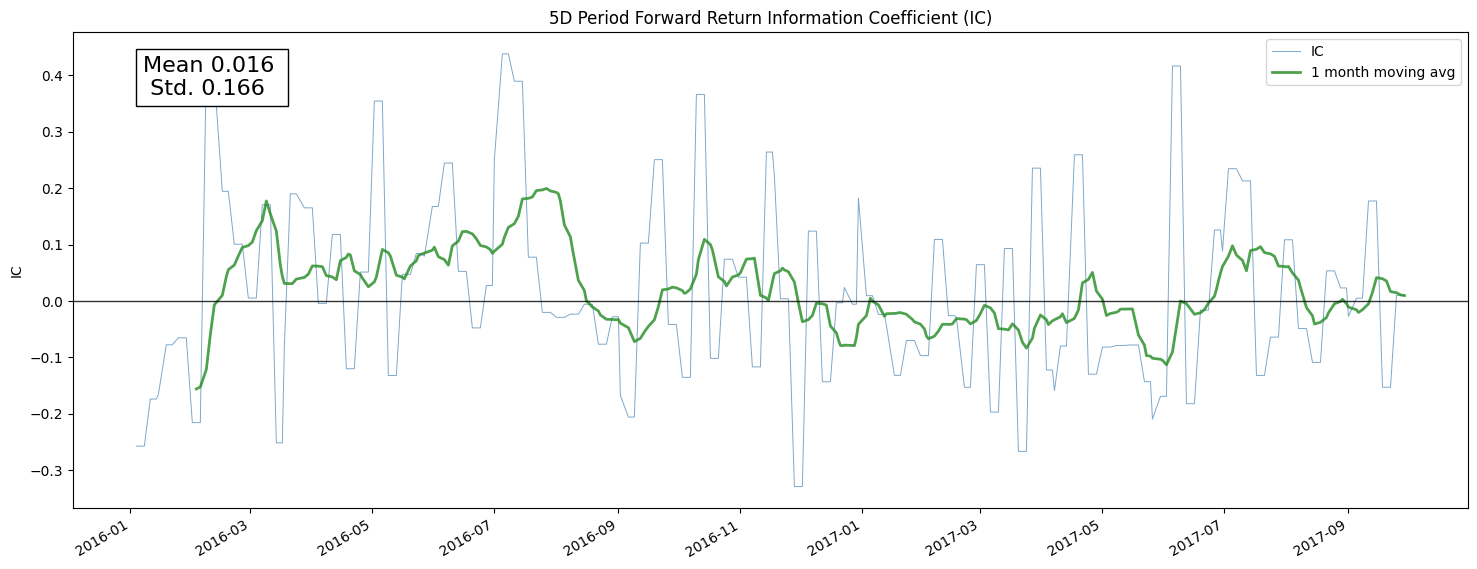

In [71]:
plot_ic_ts(ic[["5D"]])

10일 보유 기간에 대한 IC 플롯

array([<Axes: title={'center': '10D Period Forward Return Information Coefficient (IC)'}, ylabel='IC'>],
      dtype=object)

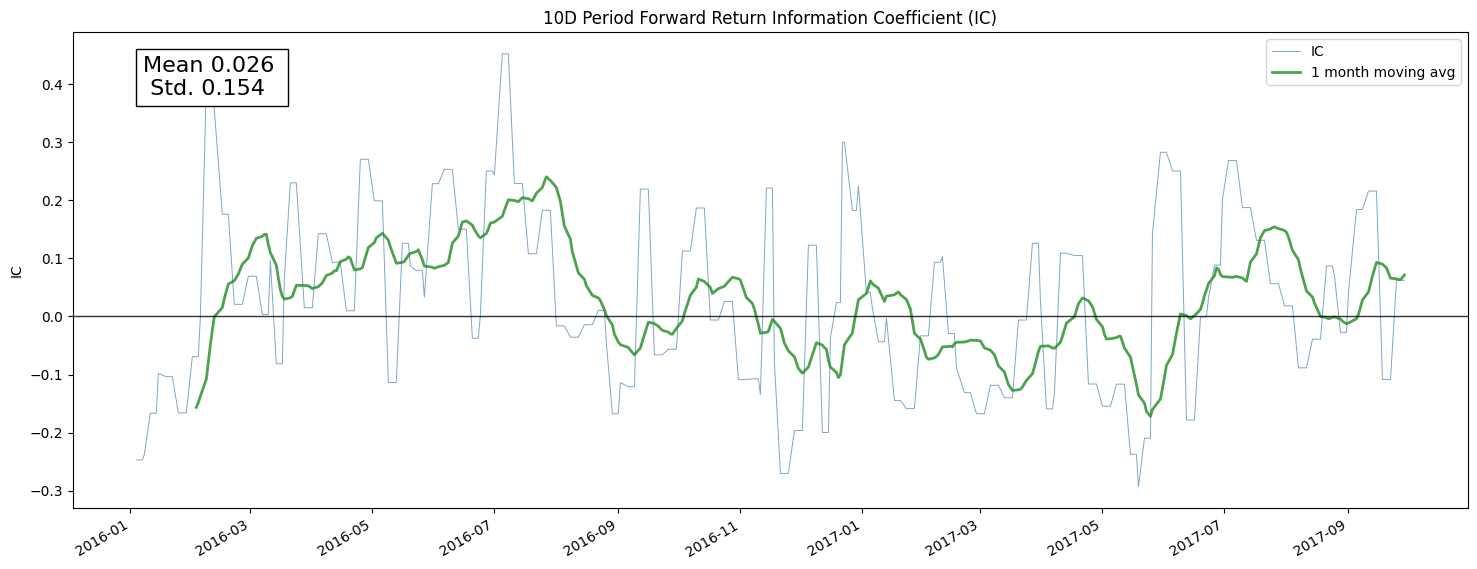

In [72]:
plot_ic_ts(ic[["10D"]])

factor_information_coefficient() 함수의 반환값이 DataFrame이므로, 이전에 배운 모든 메서드를 사용하여 IC를 추가로 분석할 수 있습니다. 이 코드는 일별 IC를 분기별 평균으로 리샘플링하고 각 예측 기간별 값을 플롯합니다:

보유 기간별 분기별 평균 IC를 계산하고 플롯

결과는 각 예측 기간별로 분기별 평균 IC를 시각화한 막대 차트입니다:

<Axes: xlabel='date'>

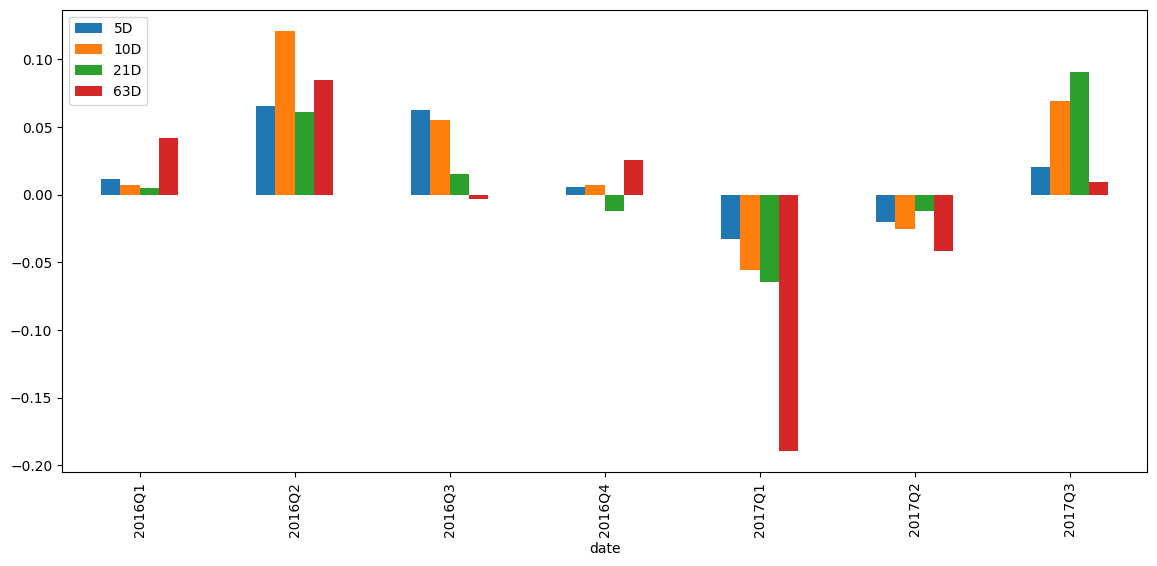

In [73]:
ic_by_quarter = ic.resample("Q").mean()
ic_by_quarter.index = ic_by_quarter.index.to_period("Q")
ic_by_quarter.plot.bar(figsize=(14, 6))

---

### 참고 자료

**정보 계수(Information Coefficient)** 는 고급 주제에 속합니다. 다음 자료를 참고하여 학습을 시작할 수 있습니다.

- **Investopedia의 정보 계수(Information Coefficient) 설명:**  
  [https://www.investopedia.com/terms/i/information-coefficient.asp](https://www.investopedia.com/terms/i/information-coefficient.asp)

- **스피어만 순위 상관관계(Spearman Rank Correlation Coefficient) 상세 설명:**  
  [https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient](https://en.wikipedia.org/wiki/Spearman%27s_rank_correlation_coefficient)

---

## 팩터터 수익률 성과 분석

팩터 성과는 특정 팩터 값에 기반하여 명시적으로 구성된 포트폴리오가 생성한 수익률을 의미합니다. 이러한 팩터는 가치, 모멘텀, 크기, 변동성 또는 본 사례에서는 평균 회귀(mean reversion)와 같은 자산의 측정 가능한 특성이나 특성 집합을 포함할 수 있습니다. 팩터 포트폴리오를 구성할 때, 팩터 값이 높은 자산은 매수(long)하고, 값이 낮은 자산은 매도(short)합니다. 이 접근 방식은 고려 중인 팩터에 의해 발생한 수익률만을 분리하여 평가하는 것을 목표로 합니다. 팩터 수익률이 순수하게 해당 팩터로 인한 것인지 확인하기 위해, 평균 조정(demeaning)이나 그룹 조정(group adjustments)과 같은 다양한 조정이 적용됩니다.

반면, 포트폴리오 수익률은 특정 팩터 값과 반드시 연관되지 않는 투자 전략을 기반으로 생성된 수익률을 나타냅니다. 이러한 포트폴리오는 기대 수익률, 리스크, 기본적 분석, 기술적 지표 등과 같은 기준을 바탕으로 구성될 수 있습니다. 포트폴리오 내 자산의 가중치는 동등 가중(equally weighted), 시가총액 가중(market-cap weighted) 또는 기타 방식으로 다양하게 조정될 수 있습니다. 일반적인 포트폴리오 수익률을 평가하는 주요 목적은 투자 전략의 효과를 측정하는 것으로, 이를 통해 포트폴리오 성과가 벤치마크나 기타 투자 대안과 비교하여 어떤 위치에 있는지 파악할 수 있습니다. 팩터 수익률과 달리, 일반적인 포트폴리오 수익률은 특정 팩터터로 인한 수익률을 분리하려는 의도 없이 포트폴리오 성과를 종합적으로 보여줍니다.

이 가이드는 **Alphalens Reloaded**에서 제공하는 기능을 활용하여 요인 수익률 성과를 분석하는 방법을 설명합니다.

---

### **실행 방법...**

이제 **어떻게 작동하는지(How it works)** 섹션에서 수익률 데이터를 분석하는 방법을 살펴보겠습니다.

In [74]:
import warnings

1. 요인 성과를 평가하기 위해 Alphalens Reloaded에서 추가 라이브러리를 가져옵니다:

In [75]:
import alphalens
import pandas as pd
from alphalens.performance import (
    compute_mean_returns_spread,
    cumulative_returns,
    factor_alpha_beta,
    factor_cumulative_returns,
    factor_returns,
    mean_return_by_quantile,
)
from alphalens.utils import get_clean_factor_and_forward_returns
from IPython.display import Markdown, display

In [76]:
warnings.filterwarnings("ignore")

평균 회귀 데이터 불러오기

In [77]:
mean_reversion = pd.read_pickle("mean_reversion.pickle")

가격 데이터를 위해 열에는 종목 심볼, 행에는 날짜가 있는 데이터프레임 구성

In [78]:
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

열 이름을 문자열로 변환

In [79]:
prices.columns = [col.symbol for col in prices.columns]

시간대 정보를 유지하면서 타임스탬프를 자정으로 정규화

In [80]:
prices.index = prices.index.normalize()

열에는 종목 심볼, 행에는 팩터 순위가 있는 데이터프레임 구성

In [81]:
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

열 이름을 문자열로 변환

In [82]:
factor_data.columns = [col.symbol for col in factor_data.columns]

시간대 정보를 유지하면서 타임스탬프를 자정으로 정규화

In [83]:
factor_data.index = factor_data.index.normalize()

날짜를 레벨 0, 종목 심볼을 레벨 1로 하는 멀티인덱스 생성

In [84]:
factor_data = factor_data.stack()

멀티인덱스 이름 변경

In [85]:
factor_data.index.names = ["date", "asset"]

Alphalens를 사용하여 선행 수익률, 팩터 순위 및 팩터터 분위수를 계산

In [94]:
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


In [95]:
alphalens_data

5D       10D       21D       63D  \
date                      asset                                           
2016-01-04 00:00:00+00:00 A      0.000000  0.000000  0.000000  0.000000   
                          AAL    0.004155 -0.050110 -0.037399 -0.037644   
                          AAP   -0.034091 -0.050053  0.017407 -0.028705   
                          AAPL  -0.064737 -0.082487 -0.084670  0.054770   
                          ABBV  -0.064746 -0.045478 -0.055893  0.027773   
...                                   ...       ...       ...       ...   
2017-09-29 00:00:00+00:00 NTAP   0.000000  0.000000  0.000000  0.308197   
                          CPN    0.007488  0.012253  0.012253  0.012253   
                          EFX    0.025883  0.068132  0.037301  0.051480   
                          ANDV  -0.014533  0.013108 -0.013868  0.085676   
                          ALNY   0.045027  0.038021  0.050581  0.065277   

                                 factor  factor_quantile  
date                      asset                           
2016-01-04 00:00:00+00:00 A       321.0                1  
                          AAL    1156.0                3  
                          AAP    1556.0                4  
                          AAPL   2547.0                5  
                          ABBV    438.0                1  
...                                 ...              ...  
2017-09-29 00:00:00+00:00 NTAP    456.0                1  
                          CPN    1907.0                4  
                          EFX    2501.0                5  
                          ANDV   1194.0                3  
                          ALNY    320.0                1  

[131916 rows x 6 columns]

2. 팩터 값에 가중치를 부여한 포트폴리오의 기간별 수익률을 계산합니다:

팩터터 수익률을 계산하고 표시합니다

In [87]:
returns = factor_returns(alphalens_data)

그 결과, 각 미래 기간(forward return period)에 대한 포트폴리오 수익률을 포함하는 DataFrame이 생성됩니다.


In [88]:
display(returns)

,5D,10D,21D,63D
date,,,,
2016-01-04 00:00:00+00:00,-0.014223,-0.022343,-0.013397,-0.017166
2016-01-05 00:00:00+00:00,-0.014223,-0.022343,-0.013397,-0.017166
2016-01-06 00:00:00+00:00,-0.014223,-0.022343,-0.013397,-0.017166
2016-01-07 00:00:00+00:00,-0.014223,-0.022343,-0.024905,-0.017166
2016-01-08 00:00:00+00:00,-0.014223,-0.021817,-0.024905,-0.013166
...,...,...,...,...
2017-09-25 00:00:00+00:00,-0.000310,0.000553,-0.000331,-0.007766
2017-09-26 00:00:00+00:00,-0.000310,0.000553,-0.000331,-0.015424
2017-09-27 00:00:00+00:00,-0.000310,0.000553,-0.000331,-0.015424


3. 자산별 수익률 검사:
 
자산별 팩터 수익률을 계산하고 표시

In [89]:
returns = factor_returns(alphalens_data, by_asset=True)

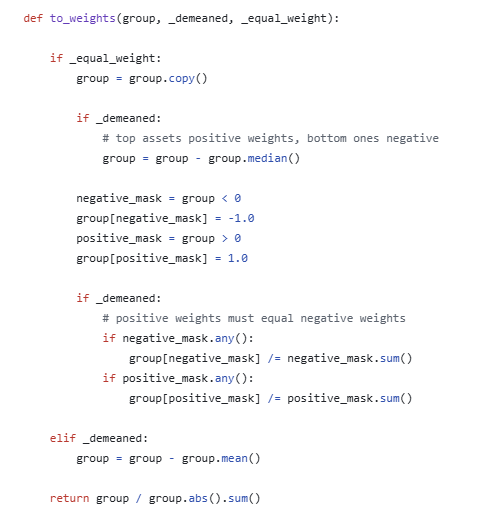

결과는 각 자산의 수익률이 관련 팩터로로 가중치가 부여된 다음과 같은 다중 인덱스 DataFrame입니다:

In [54]:
display(returns)

5D       10D       21D       63D
date                      asset                                        
2016-01-04 00:00:00+00:00 AAL   -0.000006  0.000078  0.000058 -0.000064
                          AAPL  -0.001374 -0.001751 -0.001797  0.001162
                          ABBV   0.000862  0.000605  0.000744 -0.000370
                          AET    0.000211  0.000237  0.000316  0.000380
                          AGN   -0.000052 -0.000100 -0.000158 -0.000191
...                                   ...       ...       ...       ...
2017-09-29 00:00:00+00:00 ADP   -0.000008 -0.000008 -0.000008 -0.000008
                          COL    0.000130  0.000285  0.000417  0.000417
                          BBY    0.000939  0.001407  0.001407  0.001407
                          EFX    0.000411  0.001081  0.000592  0.000444
                          SBAC   0.000143  0.000635  0.000635  0.000635

[43995 rows x 4 columns]

4. 5일 선행 수익률에 대해 요인 가중치가 적용된 누적 포트폴리오 수익률과 동일 가중치 포트폴리오를 비교하여 시각화합니다:
 
누적 수익률 그래프 작성
 
결과는 포트폴리오의 누적 수익률을 보여주는 다음과 같은 그래프입니다:

<Axes: xlabel='date'>

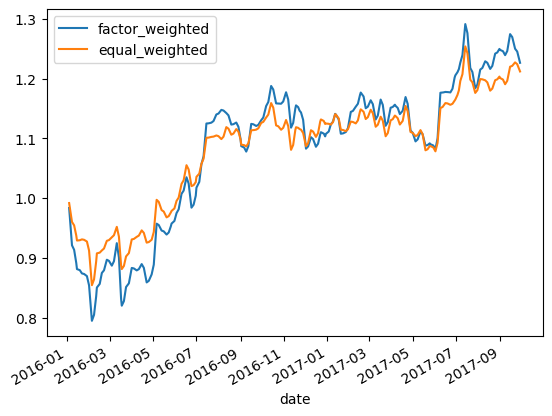

In [55]:
pd.concat(
    {
        "factor_weighted": factor_cumulative_returns(alphalens_data, period="5D"),
        "equal_weighted": factor_cumulative_returns(
            alphalens_data, period="5D", equal_weight=True
        ),
    },
    axis=1,
).plot()

5. 선행 수익률에 대한 요인 분위수별 평균 수익률 계산:
 
분위수별 평균 수익률을 계산하고 표시
 
6. 결과는 각 분위수의 선행 수익률별 평균 수익률을 시각화한 다음과 같은 막대 차트입니다:

,5D,10D,21D,63D
factor_quantile,,,,
1,-0.001200,-0.002346,-0.002042,0.000232
2,0.000292,-0.000324,-0.000758,0.001260
3,-0.000259,-0.000231,0.001733,0.001246
4,0.000911,0.001907,0.001350,0.000668
5,0.000256,0.000998,-0.000274,-0.003392


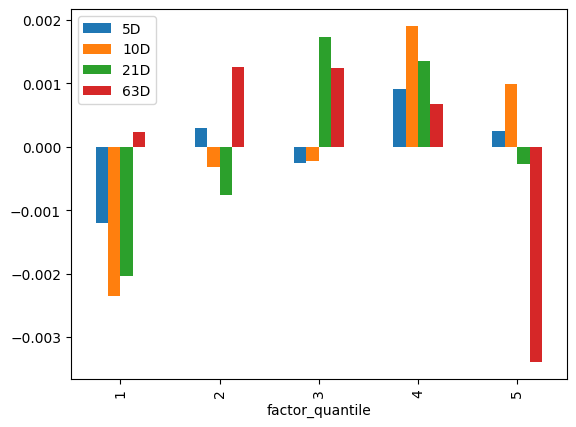

In [90]:
mean_returns, std_err = mean_return_by_quantile(alphalens_data)
mean_returns.plot.bar()
display(mean_returns)

7. 상위 분위수와 하위 분위수 포트폴리오 간의 평균 수익률 차이를 계산:
 
날짜별 평균 수익률을 계산하고 수익률 차이를 표시

In [91]:
mean_returns_by_date, _ = mean_return_by_quantile(alphalens_data, by_date=True)

In [92]:
mean_return_difference, _ = compute_mean_returns_spread(
    mean_returns=mean_returns_by_date,
    upper_quant=1,
    lower_quant=5,
)

8. 결과는 상위 분위수와 하위 분위수 간의 평균 수익률 차이를 보여주는 DataFrame입니다. 일별 값을 월별로 리샘플링하고 평균을 구한 뒤 시각화할 수 있습니다:

결과는 5일 선행 수익률에 대한 월별 평균 스프레드를 보여주는 다음과 같은 그래프입니다:

<Axes: xlabel='date'>

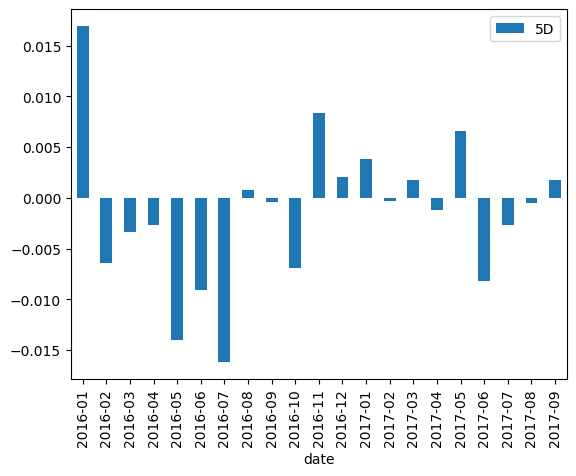

In [93]:
mean_return_difference[["5D"]].resample("M").mean().to_period("M").plot.bar()

---

### **작동 방식**

`factor_returns()` 함수는 요인 가중 수익률(factor-weighted returns)을 계산하는 기능을 합니다. 이 함수는 두 개의 주요 인수를 받습니다:  
- `factor_data`: 요인 값, 각 기간의 미래 수익률(forward returns), 분위수(quantiles), 그리고 수익률을 계산할 기간 목록(`periods`)을 포함하는 **MultiIndex DataFrame**입니다.  
- `periods`: 수익률을 계산할 기간 목록입니다.  

각 지정된 기간에 대해, 이 함수는 요인 값을 미래 수익률과 곱하여 요인 가중 수익률을 계산합니다. 또한, 기본적으로 적용되는 요인 가중을 사용하지 않고, 동등 가중 포트폴리오(equal-weighted portfolio)를 가정할 수도 있습니다. 이는 성과 비교에 유용합니다.

`factor_cumulative_returns()` 함수는 요인의 누적 수익률(cumulative returns)을 계산하는 기능을 합니다.  
- `factor_data` 인수는 요인 값, 미래 수익률, 그리고 그룹 코드(group codes)를 포함하는 **MultiIndex DataFrame**입니다.  
- `period` 인수는 누적 수익률을 계산할 기간을 지정합니다.  
- `demeaned` 인수가 `True`로 설정되면, `alphalens_data` DataFrame에 포함된 그룹 코드(group codes)를 기반으로 수익률이 평균 조정됩니다.  

이 함수는 각 날짜에 대한 평균 수익률을 계산한 후, 이러한 평균 수익률의 누적 곱(cumulative product)을 결정하여 시계열 데이터(time-series of cumulative returns)로 반환합니다.

`mean_return_by_quantile()` 함수는 분위수(quantiles)별로 요인의 평균 수익률을 계산하는 기능을 합니다.  
이 함수는 요인 포트폴리오 관리(context of factor portfolio management)에서 시간에 따른 특정 분위수의 성과를 이해하는 데 유용합니다.  

- 분위수 간 스프레드(spread between quantiles)는 다음 단계에서 살펴볼 핵심 요소입니다.  
- 이 함수는 `by_date`, `demeaned`, `group_adjust`, `by_group` 등의 매개변수를 통해 유연성을 제공합니다. 이러한 매개변수는 수익률이 어떻게 계산되고 그룹화되는지를 결정합니다.  
- 기본 연산은 분위수별로 데이터를 그룹화하며, 설정된 플래그(flags)에 따라 날짜 또는 그룹 코드 기준으로 평균 수익률을 계산합니다.  

결과는 **MultiIndex DataFrame**으로, 각 분위수별 평균 수익률(mean returns)을 포함하며, 선택적으로 날짜(dates)와 분위수(quantiles) 정보도 포함할 수 있습니다.

`compute_mean_returns_spread()` 함수는 지정된 기간 동안 분위수 간 평균 수익률 스프레드(mean returns spread)를 계산하는 기능을 합니다.  

- 서로 다른 분위수(quantiles) 간 평균 수익률 차이를 계산하여, 시간이 지남에 따라 또는 다양한 그룹 간에 **알파(alpha) 요인이 고성과(high-performing)와 저성과(low-performing) 자산을 얼마나 잘 구별할 수 있는지에 대한 통찰력(insights)** 을 제공합니다.

---

### **추가 정보...**

Alphalens Reloaded를 사용하면 요인의 **알파(alpha)**(초과 수익률, excess returns)와 **베타(beta)**(시장 노출도, market exposure)를 계산할 수 있습니다.  

이를 위해 `factor_alpha_beta()` 함수를 호출하면,  
- 독립 변수(independent variable)로 각 기간에 대한 요인 데이터(factor universe)를,  
- 종속 변수(dependent variable)로는 각 기간의 요인 값에 가중치를 부여한 포트폴리오 평균 수익률을 사용하여 회귀 분석(regression)을 수행합니다.

결과는 각 미래 수익률에 대한 연간화된 알파와 베타를 포함하는 DataFrame입니다:

알파와 베타를 계산하고 표시

In [60]:
alpha_beta = factor_alpha_beta(alphalens_data)
display(alpha_beta)

,5D,10D,21D,63D
Ann. alpha,0.006204,0.015760,-0.003038,-0.012823
beta,0.136634,0.123627,0.117090,0.147144


5장 주식 포트폴리오를 위한 알파 팩터 구축에서 배웠듯이, 알파는 팩터의 성과를 측정하는 지표입니다. 양의 알파는 팩터가 위험 조정 기준으로 벤치마크를 초과 달성했음을 나타내고, 음의 알파는 성과 부진을 의미합니다. 베타는 벤치마크 대비 팩터의 위험에 대한 통찰을 제공합니다. 1보다 큰 베타는 팩터가 벤치마크보다 변동성이 크다는 것을 나타내고, 1보다 작은 베타는 변동성이 더 작다는 것을 의미합니다. 5일과 10일의 선행 수익률에서 우리의 팩터는 양의 알파를 생성하는 것으로 보입니다.

---

### 참고 자료

**Applied Quantitative Research (AQR)** 는 다양한 자산 클래스를 대상으로 투자 기회를 포착하기 위해 체계적이고 연구 기반의 접근 방식을 사용하는 글로벌 투자 관리 회사입니다. AQR은 1998년 클리프 애스니스(Cliff Asness), 데이비드 카빌러(David Kabiller), 존 류(John Liew), 로버트 크레일(Robert Krail)에 의해 설립되었으며, 정량적이고 데이터 기반의 전략에 초점을 맞추어 학문적 연구와 실무적인 시장 경험을 결합하는 것으로 잘 알려져 있습니다. AQR은 팩터 투자에 대한 광범위한 연구를 작성하며, 팩터 익스포저 측정에 관한 훌륭한 논문이 있습니다:  
[Measuring Portfolio Factor Exposures - A Practical Guide](https://www.aar.com/-/media/AQR/Documents/Insights/Trade-Publications/Measuring-Portfolio-Factor-Exposures-A-Practical-Guide.pdf)

---

## 팩터 회전율 평가

알고리즘 트레이딩에서, 팩터 포트폴리오는 다양한 전략의 기반을 형성합니다. 이전 예제에서 학습한 것처럼, 자산은 **스피어만 순위 상관관계(Spearman rank correlation)** 를 사용하여 높은 순위에서 낮은 순위로 체계적으로 정렬됩니다. 이 순위를 따른 후, **상위 4분위(quartile)의 자산은 매수되고 하위 4분위의 자산은 매도** 됩니다. 이러한 맥락에서 **이탈률(turnover)** 은 지정된 분위(quartile)를 재조정하기 위해 자산이 얼마나 자주 매수 또는 매도되는지를 정량화합니다.

팩터가 높은 이탈률을 보이면, 해당 팩터의 신호가 지속적이지 않으며 해당 팩터를 기반으로 거래할 경우 높은 거래 비용이 발생할 가능성을 시사할 수 있습니다. 반대로, 이탈률이 낮은 팩터는 보다 안정적인 신호를 나타낼 수 있습니다. 분위 수준에서 이탈률을 분석하면, 자산 유니버스의 다양한 세그먼트에서 팩터 순위의 안정성에 대한 통찰을 얻을 수 있습니다. 이는 팩터의 신뢰성과 잠재적인 거래 비용을 평가할 때 특히 유용할 수 있습니다.

이 예제에서는 **Alphalens Reloaded**의 기능을 사용하여 이탈률을 분석하는 방법을 보여줍니다.

---

### 실행 방법...

**Alphalens Reloaded**를 사용하여 특정 팩터 분위에 속한 자산 중 이전 기간에는 해당 분위에 속하지 않았던 자산의 비율을 계산할 것입니다. 이는 포트폴리오 내에서 분위의 집계 변화를 측정하는 좋은 방법입니다.


In [61]:
import warnings

1. **Alphalens Reloaded에서 이탈률 평가를 위한 추가 라이브러리 가져오기**:

In [62]:
import alphalens
import pandas as pd
from alphalens.performance import factor_rank_autocorrelation, quantile_turnover
from alphalens.plotting import plot_factor_rank_auto_correlation
from alphalens.utils import get_clean_factor_and_forward_returns
from IPython.display import Markdown, display

In [63]:
warnings.filterwarnings("ignore")

평균 회귀 데이터 불러오기

In [64]:
mean_reversion = pd.read_pickle("mean_reversion.pickle")

가격 데이터를 위해 열에는 종목 심볼, 행에는 날짜가 있는 데이터프레임 구성

In [65]:
prices = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.prices.dropna().items()], axis=1
).T

열 이름을 문자열로 변환

In [66]:
prices.columns = [col.symbol for col in prices.columns]

시간대 정보를 유지하면서 타임스탬프를 자정으로 정규화

In [67]:
prices.index = prices.index.normalize()

열에는 종목 심볼, 행에는 팩터 순위가 있는 데이터프레임 구성

In [68]:
factor_data = pd.concat(
    [df.to_frame(d) for d, df in mean_reversion.factor_data.dropna().items()], axis=1
).T

열 이름을 문자열로 변환

In [69]:
factor_data.columns = [col.symbol for col in factor_data.columns]

시간대 정보를 유지하면서 타임스탬프를 자정으로 정규화

In [70]:
factor_data.index = factor_data.index.normalize()

날짜를 레벨 0, 종목 심볼을 레벨 1로 하는 멀티인덱스 생성

In [71]:
factor_data = factor_data.stack()

멀티인덱스 이름 변경

In [72]:
factor_data.index.names = ["date", "asset"]

Alphalens를 사용하여 선행 수익률, 팩터 순위 및 팩터 분위수 컴파일

In [73]:
alphalens_data = get_clean_factor_and_forward_returns(
    factor=factor_data, prices=prices, periods=(5, 10, 21, 63)
)

Dropped 12.5% entries from factor data: 12.5% in forward returns computation and 0.0% in binning phase (set max_loss=0 to see potentially suppressed Exceptions).
max_loss is 35.0%, not exceeded: OK!


2. **첫 번째 분위(상위 4분위)에 대한 포트폴리오 이탈률 계산**:

분위수 이탈률 계산 및 표시

In [74]:
turnover = quantile_turnover(alphalens_data, quantile=1)

이 결과는 **이전 기간에는 해당 분위에 속하지 않았던 자산의 비율을 포함하는 시리즈(Series) 형태**로 반환됩니다.

In [75]:
display(turnover)

date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    0.000000
2016-01-06 00:00:00+00:00    0.000000
2016-01-07 00:00:00+00:00    0.000000
2016-01-08 00:00:00+00:00    0.000000
                               ...   
2017-09-25 00:00:00+00:00    0.030303
2017-09-26 00:00:00+00:00    0.000000
2017-09-27 00:00:00+00:00    0.000000
2017-09-28 00:00:00+00:00    0.000000
2017-09-29 00:00:00+00:00    0.000000
Freq: C, Name: 1, Length: 440, dtype: float64

3. 일별 값을 월별로 리샘플링하고 첫 번째 분위에 대한 평균 이탈률 플롯:
 
월별 평균 분위 이탈률 플롯
 
결과는 첫 번째 분위에 대한 월별 평균 이탈률을 보여주는 막대 차트입니다:

<Axes: xlabel='date'>

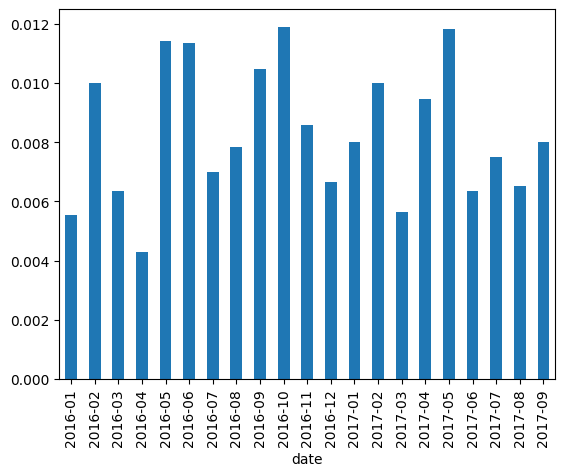

In [76]:
turnover.resample("M").mean().to_period("M").plot.bar()

다음은 해당 텍스트의 한국어 번역입니다:

---

### 작동 방식...

`quantile_turnover()` 함수는 특정 기간 동안 팩터 분위(factor quantile)의 이탈률(turnover)을 계산합니다. 팩터 포트폴리오 분석에서 이탈률은 포트폴리오 내에서 자산이 새로운 자산으로 교체되는 비율을 의미합니다. **이탈률이 높으면 빈번한 거래를 나타내며, 이로 인해 거래 비용이 증가할 수 있습니다. 반면, 이탈률이 낮으면 장기 보유(buy-and-hold) 전략을 의미할 수 있습니다**. 팩터 분위의 이탈률을 분석하면 **팩터 순위가 시간이 지나면서 얼마나 안정적인지 평가할 수 있습니다**.

이 함수는 다음과 같은 매개변수를 입력받습니다:

- **`alphalens_data`**: 팩터 값, 각 기간의 미래 수익률(forward returns), 해당 팩터 값이 속한 분위(bin), 그리고 (선택적으로) 해당 자산이 속한 그룹을 포함하는 **다중 인덱스 데이터프레임(multi-index DataFrame)**.
- **`quantiles`**: 정수 또는 정수의 시퀀스. 정수인 경우 팩터 값에서 **최상위 및 최하위 분위**를 선택합니다. 시퀀스인 경우 정확한 분위를 정의합니다.
- **`period`**: 이탈률을 계산할 기간을 지정합니다. 기본값은 `'1D'`(일별 이탈률)입니다.

이 함수는 먼저 **지정된 분위에 대해 팩터 데이터를 필터링**합니다. 이후 **데이터를 날짜 및 분위별로 그룹화하고, 각 그룹에서 현재 및 이전 날짜의 자산 간 차집합(set difference)을 계산**합니다. 이 차집합은 해당 분위에 **새롭게 추가되거나 제거된 자산을 나타냅니다**. 그런 다음, **지정된 기간 동안 각 분위의 평균 이탈률을 계산**합니다.

---

### 추가 정보

또 다른 일반적인 이탈률 분석 기법은 **팩터의 일별 스피어만 순위 상관관계(Spearman rank correlation)의 자기상관(autocorrelation)을 분석하는 방법**입니다. **팩터 순위 자기상관(factor rank autocorrelation)**은 팩터 포트폴리오 분석에서 중요한 지표로 다음과 같은 이유로 활용됩니다:

- **팩터 순위 안정성(Stability of Factor Ranks)**:  
  팩터 순위의 자기상관은 **시간이 지나면서 팩터 순위의 안정성에 대한 통찰을 제공합니다**. **자기상관이 높으면** 해당 팩터의 순위가 **하루에서 다음 날까지 상대적으로 안정적임을 나타냅니다**. 이러한 안정성은 **팩터 순위의 지속성(persistence)에 의존하는 전략에 유리할 수 있습니다**.

- **이탈률 영향(Turnover Implications)**:  
  **순위 자기상관이 높은 팩터는 포트폴리오 이탈률이 낮은 경향**이 있습니다. 이는 **팩터 기반 자산의 순위가 한 기간에서 다음 기간까지 크게 변하지 않으면, 해당 순위를 기반으로 구성된 포트폴리오 내의 포지션도 안정적으로 유지될 가능성이 높기 때문**입니다. 이탈률이 낮으면 **거래 비용이 줄어들어 전략의 순 수익(net returns)이 향상될 수 있습니다**.

- **팩터 일관성(Factor Consistency)**:  
  **자산 간 순위를 유지하는 일관된 팩터는 일반적으로 정량적 전략에서 선호됩니다**. **순위 자기상관이 높다면 해당 팩터가 시간이 지나면서 특정 자산의 상대적 매력도를 자주 변경하지 않는다는 것을 의미할 수 있습니다**.

- **리스크 관리(Risk Management)**:  
  팩터 순위의 자기상관을 이해하면 **리스크 관리에도 도움이 됩니다**. 특정 팩터의 순위가 매우 변동성이 크다면(즉, 자기상관이 낮다면), **포트폴리오 전략에서 추가적인 리스크를 초래할 가능성이 있습니다**. 이러한 점을 인지하면 **적절한 리스크 통제 방안을 설계하는 데 도움이 됩니다**.

팩터 순위의 자기상관은 `factor_rank_autocorrelation()` 함수를 사용하여 측정할 수 있습니다.  
이 함수는 주어진 팩터의 **일별 순위 자기상관을 계산하며, 특정 날짜의 팩터 값과 그 다음 날의 팩터 값 간 스피어만 순위 상관관계를 측정**합니다.

이 함수는 다음과 같은 매개변수를 입력받습니다:

- **`alphalens_data`**:  
  **팩터 값, 각 기간의 미래 수익률, 그리고 해당 팩터 값이 속한 분위(bin)를 포함하는 다중 인덱스 데이터프레임**.  
  인덱스는 **날짜(date) 및 자산(asset)**입니다.

- **`period`**:  
  자기상관을 계산할 기간을 지정합니다. **비교할 팩터 값 사이의 시간 차이를 의미합니다**.

다음과 같이 실행할 수 있습니다:

팩터 순위 자기상관 계산 및 표시

In [77]:
factor_ac = factor_rank_autocorrelation(alphalens_data)


이 함수의 반환값은 **일별 자기상관 값이 포함된 시리즈(Series)** 입니다.

In [78]:
display(factor_ac)

date
2016-01-04 00:00:00+00:00         NaN
2016-01-05 00:00:00+00:00    1.000000
2016-01-06 00:00:00+00:00    1.000000
2016-01-07 00:00:00+00:00    1.000000
2016-01-08 00:00:00+00:00    1.000000
                               ...   
2017-09-25 00:00:00+00:00    0.787847
2017-09-26 00:00:00+00:00    1.000000
2017-09-27 00:00:00+00:00    1.000000
2017-09-28 00:00:00+00:00    1.000000
2017-09-29 00:00:00+00:00    1.000000
Freq: C, Name: 1, Length: 440, dtype: float64

>**중요 (IMPORTANT)**
>
>우리의 전략은 **매주 리밸런싱(rebalancing)을 수행**합니다. 이는 **리밸런싱이 없는 날에는 이탈률(turnover)이 발생하지 않으며, 오직 주간 리밸런싱이 이루어지는 날에만 이탈률이 발생한다는 의미입니다**. 이러한 특징은 **자기상관(autocorrelation)이 1로 나타나는 현상에서 확인할 수 있습니다**.

우리는 `plot_factor_rank_auto_correlation()` 함수를 사용하여 **시간이 지나면서 자기상관이 어떻게 변하는지 시각화할 수 있습니다**.

이 함수의 결과는 **자기상관의 시계열(time series) 플롯**입니다.

<Axes: title={'center': '1D Period Factor Rank Autocorrelation'}, ylabel='Autocorrelation Coefficient'>

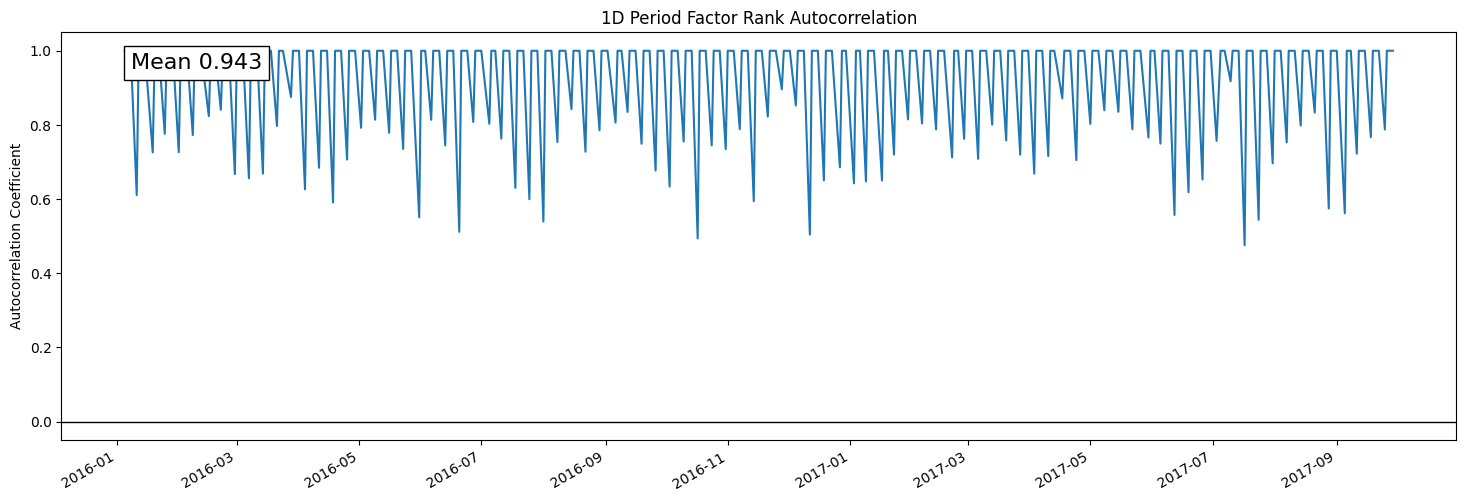

In [79]:
plot_factor_rank_auto_correlation(factor_ac)

---

### **참고 자료**

만약 이러한 지표(metrics)를 계산하는 코드에 대해 깊이 탐구하고 싶다면, 아래 링크를 방문하여 확인할 수 있습니다:

- **`quantile_turnover` 함수의 소스 코드**:  
  [https://github.com/stefan-jansen/alphalens-reloaded/blob/d4490ba1290f1f135ed398d1b3601569e0e7996b/src/alphalens/performance.py#L575](https://github.com/stefan-jansen/alphalens-reloaded/blob/d4490ba1290f1f135ed398d1b3601569e0e7996b/src/alphalens/performance.py#L575)

- **`factor_rank_autocorrelation` 함수의 소스 코드**:  
  [https://github.com/stefan-jansen/alphalens-reloaded/blob/d4490ba1290f1f135ed398d1b3601569e0e7996b/src/alphalens/performance.py#L620](https://github.com/stefan-jansen/alphalens-reloaded/blob/d4490ba1290f1f135ed398d1b3601569e0e7996b/src/alphalens/performance.py#L620)

---